SOAL :

Suatu perusahaan minuman kaleng akan memproduksi minuman jenis Ekstrak. Dari data 1 bulan terakhir, permintaan terbesar mencapai 6000 kemasan/hari, dan permintaan terkecil mencapai 1500 kemasan/hari. Persediaan barang digudang terbanyak mencapai 850 kemasan/hari, dan terkecil pernah mencapai 100 kemasan/hari. Dengan segala keterbatasannya perusahaan sampai saat ini baru mampu memproduksi barang maksimum 8000 kemasan/hari, untuk efisiensi mesin dan SDm tiap hari diharapkan perusahaan memproduksi paling tidak 3000 kemasan. Berapa kemasan minuman jenis Ekstrak yang harus diprosuksi, jika jumlah permintaan sebanyak 7000 kemasan, dan persediaan di gudang masih 400 kemasan ?

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
def turun(x,a,b):
    if(x <= a):
        nilai = 1
    elif(x > a and x < b):
        nilai = (b - x) / (b - a)
    elif(x >= b):
        nilai = 0

    return nilai

In [3]:
def naik(x,a,b):
    if (x >= b):
        nilai = 1
    elif (x > a and x < b):
        nilai = (x - a) / (b - a)
    elif (x <= a):
        nilai = 0
        
    return nilai

In [4]:
def agregasi_turun(b, a, a_predikat):
    nilai = b - (a_predikat * (b - a))
    return nilai

In [5]:

def agregasi_naik(b, a, a_predikat):
    nilai = a_predikat * (b - a) + a
    return nilai

In [6]:
nama_var = ['permintaan', 'persediaan', 'produksi'] 

variabel = {'permintaan_banyak': 6000, 'permintaan_sedikit': 1500, 'persediaan_banyak': 850, 'persediaan_sedikit': 100, 'produksi_banyak': 8000, 'produksi_sedikit': 3000} 

soal = {'permintaan': 7000, 'persediaan': 400}

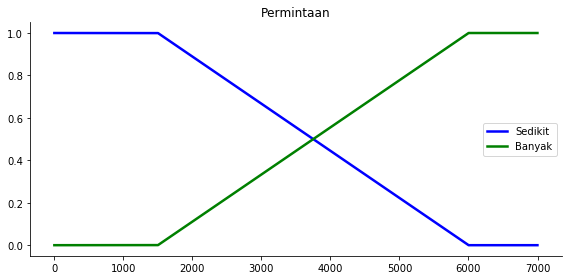

In [7]:
x_minta = np.arange(00, 7000, 1)
minta_sd = fuzz.trapmf(x_minta, [0, 0, variabel["permintaan_sedikit"], variabel['permintaan_banyak']])
minta_by = fuzz.trapmf(x_minta, [variabel["permintaan_sedikit"], variabel['permintaan_banyak'], 7000, 7000])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 4))

ax0.plot(x_minta, minta_sd, 'b', linewidth=2.5, label='Sedikit')
ax0.plot(x_minta, minta_by, 'g', linewidth=2.5, label='Banyak')

ax0.set_title('Permintaan')
ax0.legend()

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

plt.tight_layout()

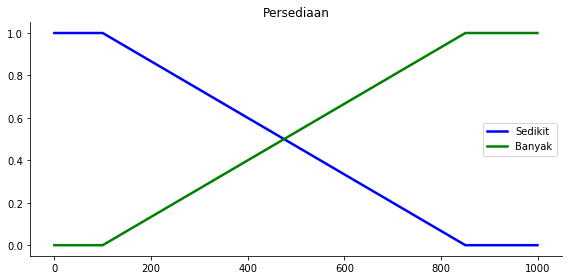

In [8]:
x_sedia = np.arange(0, 1000, 1)
sedia_sd = fuzz.trapmf(x_sedia, [0, 0, 100, 850])
sedia_by = fuzz.trapmf(x_sedia, [100, 850, 1000, 1000])

fig, (ax1) = plt.subplots(nrows=1, figsize=(8, 4))

ax1.plot(x_sedia, sedia_sd, 'b', linewidth=2.5, label='Sedikit')
ax1.plot(x_sedia, sedia_by, 'g', linewidth=2.5, label='Banyak')

ax1.set_title('Persediaan')
ax1.legend()

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()

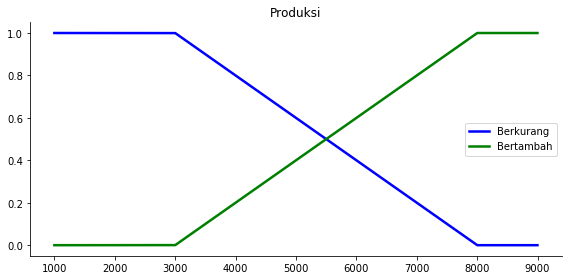

In [9]:
x_produksi  = np.arange(1000, 9000, 1)
produksi_kr  = fuzz.trapmf(x_produksi, [0, 0, 3000, 8000])
produksi_tb  = fuzz.trapmf(x_produksi, [3000, 8000, 9000, 9000])

fig, (ax2) = plt.subplots(nrows=1, figsize=(8, 4))

ax2.plot(x_produksi, produksi_kr, 'b', linewidth=2.5, label='Berkurang')
ax2.plot(x_produksi, produksi_tb, 'g', linewidth=2.5, label='Bertambah')

ax2.set_title('Produksi')
ax2.legend()

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()

In [10]:
# INFEREFENSI

hasil = dict()

for i in soal:
    up = naik(soal[i],variabel[i+"_sedikit"],variabel[i+"_banyak"])
    down = turun(soal[i],variabel[i+"_sedikit"],variabel[i+"_banyak"])
    hasil.update({i+"_banyak": up})
    hasil.update({i+"_sedikit": down})
    
print(hasil)

{'permintaan_banyak': 1, 'permintaan_sedikit': 0, 'persediaan_banyak': 0.4, 'persediaan_sedikit': 0.6}


[R1] IF Permintaan BANYAK AND Persediaan BANYAK, THEN Produksi Barang BERTAMBAH
[R2] IF Permintaan BANYAK AND Persediaan SEDIKIT, THEN Produksi Barang BERTAMBAH
[R3] IF Permintaan SEDIKIT AND Persediaan BANYAK, THEN Produksi Barang BERKURANG
[R4] IF Permintaan SEDIKIT AND Persdiaan SEDIKIT, THEN Produksi Barang BERKURANG

In [11]:
# AGREGASI

rules = [['permintaan_banyak', 'persediaan_banyak', 'bertambah'],
         ['permintaan_banyak', 'persediaan_sedikit', 'bertambah'],
         ['permintaan_sedikit', 'persediaan_banyak', 'berkurang'],
         ['permintaan_sedikit', 'persediaan_banyak', 'berkurang']]

a_predikat  = []
z = []

for i in (rules):
    # INSERSECTION (irisan / AND)
    a = min(hasil[i[0]], hasil[i[1]])
    a_predikat.append(a)
    
    if (i[2] == "bertambah"):
        tmp = agregasi_naik(variabel['produksi_banyak'],variabel['produksi_sedikit'], a)
    elif (i[2] == "berkurang"):
        tmp = agregasi_turun(variabel['produksi_banyak'], variabel['produksi_sedikit'], a)
    
    z.append(tmp)

In [12]:
print(a_predikat)
print(z)

[0.4, 0.6, 0, 0]
[5000.0, 6000.0, 8000, 8000]


In [13]:
#DEFUZIFIKASI

dz = 0

for i in range (len(a_predikat)):
    dz += a_predikat[i] * z[i]

hasil = (dz/sum(a_predikat))

print("Jadi, barang yang perlu diproduksi adalah " , int(hasil))


Jadi, barang yang perlu diproduksi adalah  5600
